In [2]:
import sys
sys.path.append('..')
from peakdetect import peakdetect
from utilities.functions import do_db_connection
from utilities.talib_related import db_historical_to_df
from utilities.config import DB_PATH
import numpy as np
import matplotlib.pyplot as plt


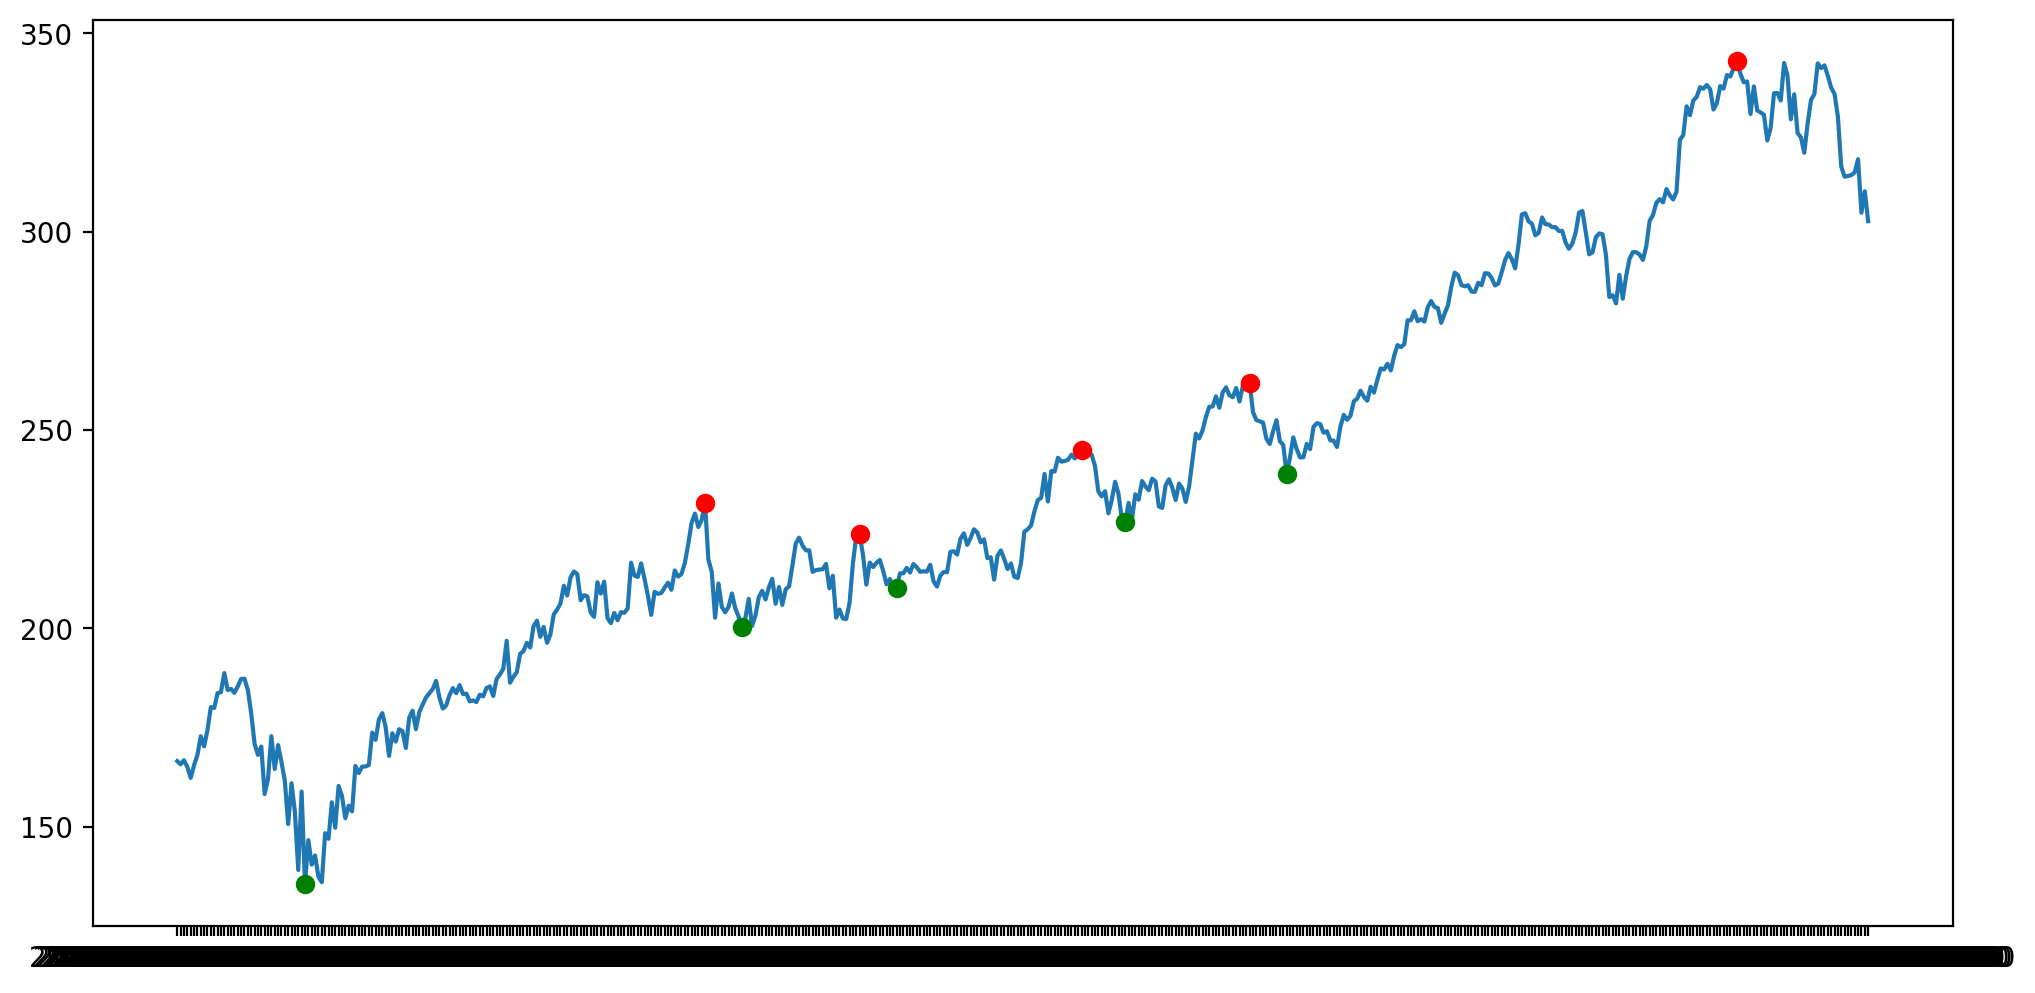

In [7]:
# def positivity_range(df, peaks):
#     data = {'gain': [], 'days_to_positivity': [], 'loss': []}
#     df_buys = df[df['Buy'] > 0]

#     for i, date in enumerate(df_buys.index):
#         df_check = df.copy()
#         df_check = df_check[date:]
#         df_check['pct_change'] = df_check['Close'].pct_change().cumsum()
#         if len(df_check[df_check['pct_change'] > 0]):
#             first_positive_val = df_check[df_check['pct_change'] > 0].iloc[0]
#             days_to_positivity = df.index.get_loc(first_positive_val.name) - peaks[i]
#             gain = first_positive_val['pct_change']* 100
#             data['gain'].append(gain)
#             data['days_to_positivity'].append(days_to_positivity)
#         else:
#             loss = df['pct_change'].iloc[-1] * 100
#             data['loss'].append(loss)
#     data['gain'] = round(np.array(data['gain']).mean(), 2)
#     data['days_to_positivity'] = round(np.array(data['days_to_positivity']).mean(), 2)
#     return data


connection = do_db_connection(DB_PATH)
cursor = connection.cursor()

# symbols in sp100
symbols = cursor.execute('select distinct Symbol from historical_data').fetchall()
symbols = [symbol['Symbol'] for symbol in symbols]
data = {}
for symbol in symbols:
    if symbol == 'MSFT':
        df = db_historical_to_df(symbol, cursor)
        
        max_peaks, min_peaks = peakdetect(df['Close'].values, lookahead=22) 

        # Filtering the peaks [A, B] -> Only get A
        min_peaks = [i for i, _ in min_peaks]
        max_peaks = [i for i, _ in max_peaks]

       
        df['Buy'] =[1 if i in min_peaks else 0 for i, _ in enumerate(df.index)]
        df['Sell'] =[1 if i in max_peaks else 0 for i, _ in enumerate(df.index)]
        
        plt.figure(figsize=(12,6), dpi=200)
        plt.plot(df.index, df['Close'])
        for i in df[df['Buy'] > 0].index:
            plt.plot(i, df.loc[i]['Close'], marker='o', c='g')
        for i in df[df['Sell'] > 0].index:
            plt.plot(i, df.loc[i]['Close'], marker='o', c='r')
        
        # plt.xticks(list(df.index[::(len(df) // 52)]))
      

        # data[symbol] = positivity_range(df, min_peaks)


In [77]:
def valuate_position(df):
    df_buys = df.copy()
    df_buys = df_buys[df_buys['Buy'] > 0]
    
    df_sells = df.copy()
    df_sells = df_sells[df_sells['Sell'] > 0]

    positions = list(zip(df_buys.index.values, df_sells.index.values))
    return positions

In [78]:
positions = valuate_position(df)
changes = []
days_to_positivity = []
for date in positions:
    start, end = date

    return_df = df.loc[start:end]
    change = round(((return_df.iloc[-1]['Close'] - return_df.iloc[0]['Close']) / abs(return_df.iloc[-1]['Close'])) * 100, 2)
    changes.append(change)
    days_to_positivity.append(len(return_df))

In [81]:
data = list(zip(changes, days_to_positivity))
data

[(1.82, 4),
 (1.78, 5),
 (7.31, 4),
 (28.39, 25),
 (2.24, 3),
 (8.99, 11),
 (6.48, 5),
 (17.1, 28),
 (4.74, 17),
 (6.01, 6),
 (15.06, 24),
 (6.49, 6),
 (3.75, 4),
 (4.14, 7),
 (2.24, 6),
 (9.65, 12),
 (9.34, 5),
 (4.22, 7),
 (3.12, 4),
 (17.57, 27),
 (1.97, 7),
 (2.66, 8),
 (13.82, 20),
 (14.13, 28),
 (4.24, 7),
 (1.17, 3),
 (1.34, 4),
 (6.02, 6),
 (2.77, 4),
 (10.55, 16),
 (3.88, 4),
 (6.48, 13)]

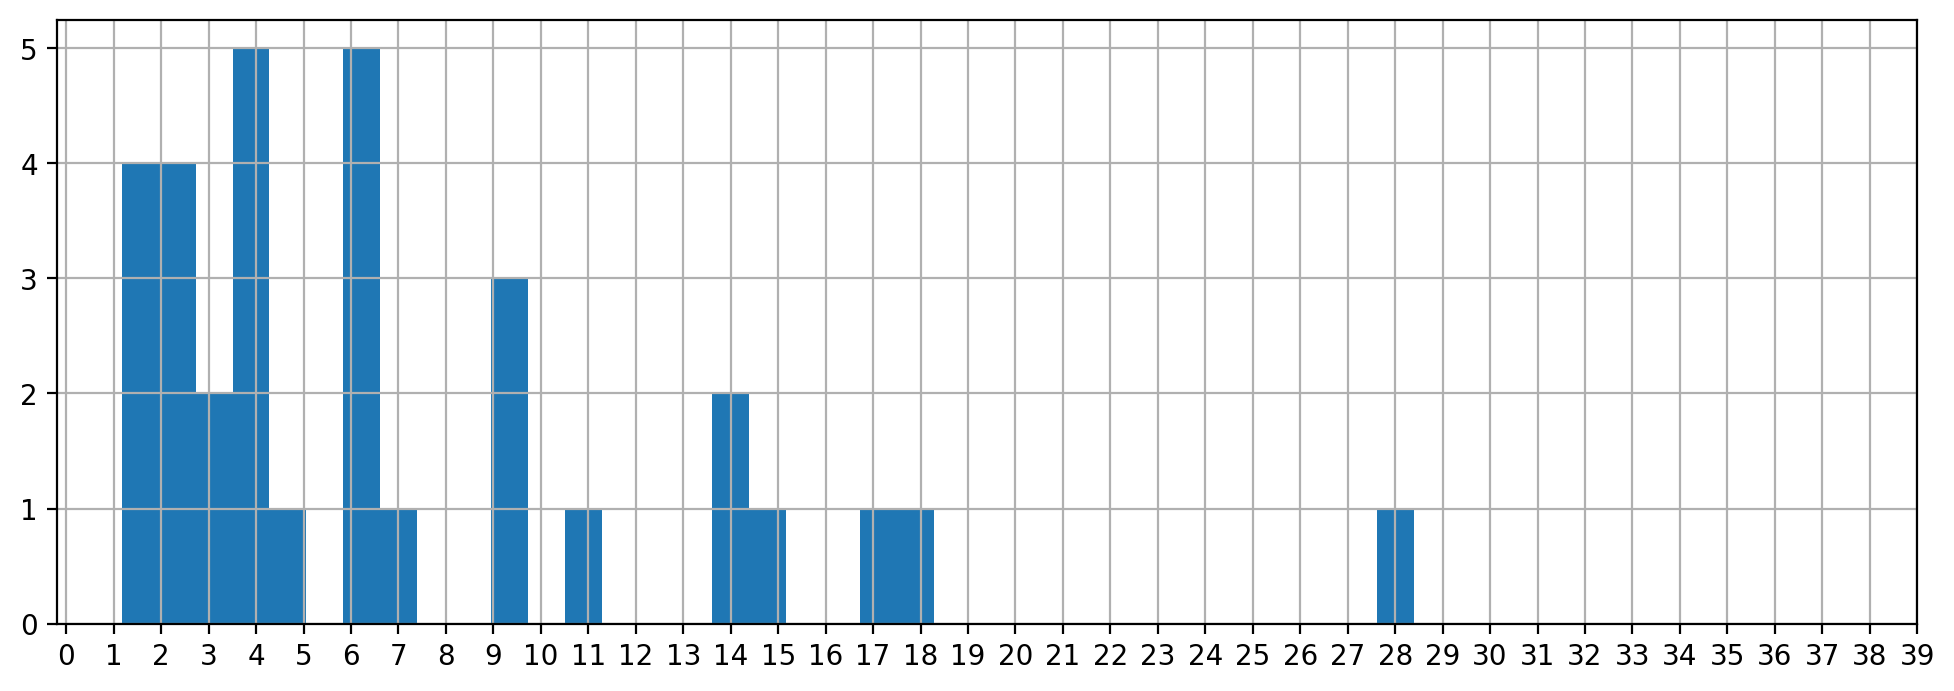

In [82]:
plt.figure(figsize=(12,4), dpi=200)
plt.hist([i for i, _ in data], bins=35);
plt.xticks(range(0, 40))
plt.grid()

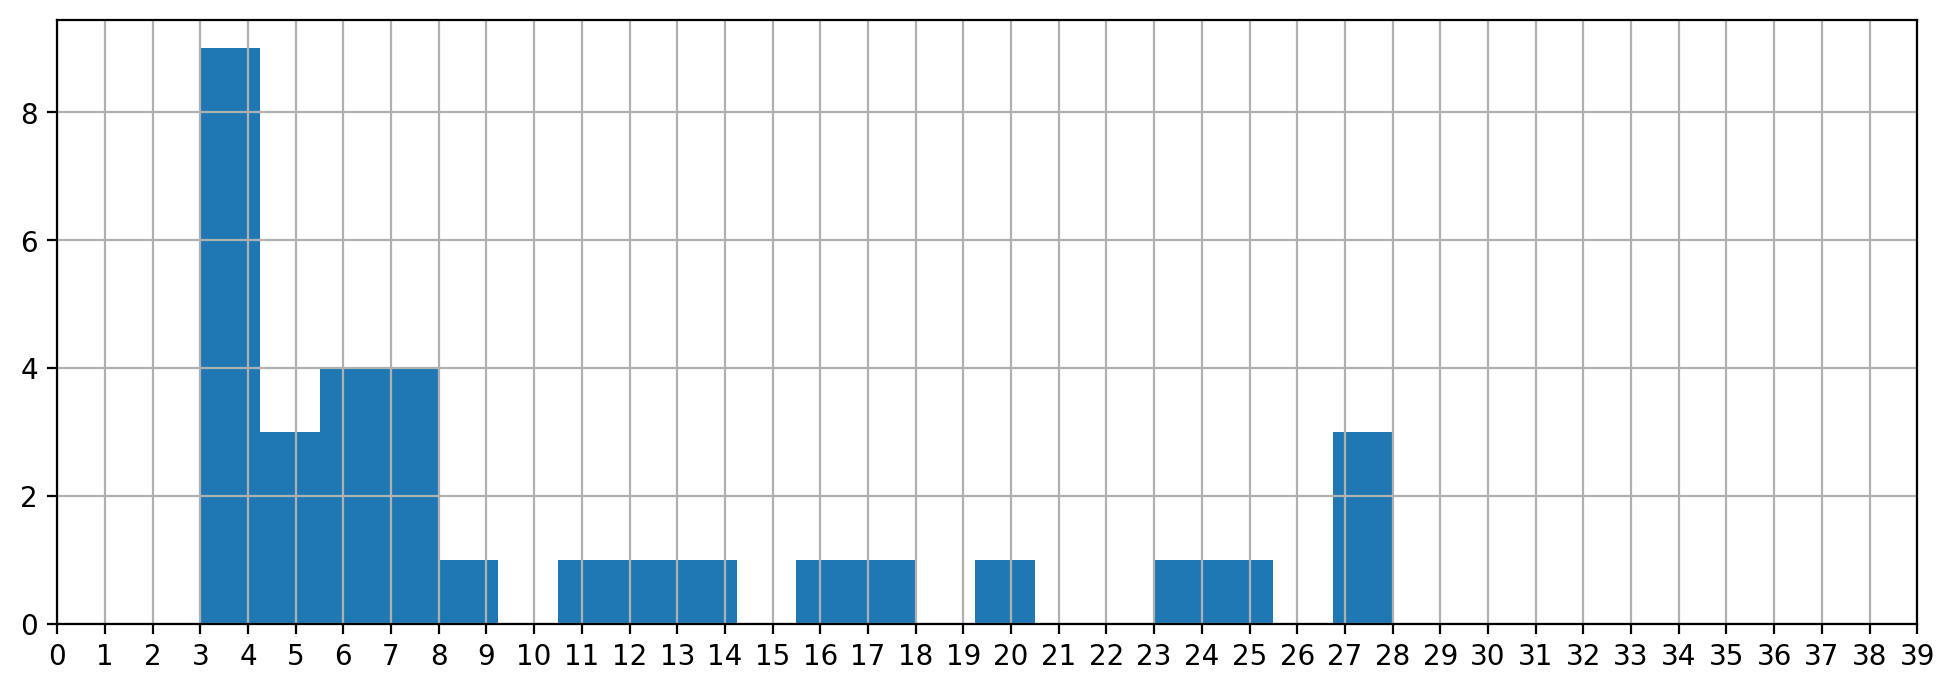

In [83]:
plt.figure(figsize=(12,4), dpi=200)
plt.hist([i for _, i in data], bins=20);
plt.xticks(range(0, 40))
plt.grid()

In [84]:
import numpy as np
mean_return = np.array(list([i for i, _ in data])).mean()
mean_return 

7.1709375

In [85]:
mean_days_top_positivity = np.array(list([i for _, i in data])).mean()
mean_days_top_positivity 

10.3125

In [75]:
# sorted_data = sorted(data, key=lambda x: data[x]['gain'], reverse=True)
# sorted_data =[(i, data[i]['gain'], data[i]['days_to_positivity']) for i in sorted_data]
len(df[df['Buy'] > 0])

33

In [196]:
print(list(data[i]['loss'] for i in data if data[i]['loss']))

[]


In [197]:
sorted_data

[('TSLA', 5.37, 1.0),
 ('BA', 4.3, 1.0),
 ('SPG', 4.1, 1.0),
 ('COF', 4.01, 1.0),
 ('GE', 3.62, 1.0),
 ('NVDA', 3.5, 1.0),
 ('AXP', 3.48, 1.0),
 ('F', 3.24, 1.03),
 ('COP', 3.16, 1.0),
 ('C', 3.14, 1.0),
 ('USB', 3.13, 1.0),
 ('RTX', 3.05, 1.0),
 ('WFC', 3.04, 1.0),
 ('ADBE', 2.94, 1.0),
 ('MET', 2.9, 1.0),
 ('AIG', 2.88, 1.0),
 ('GM', 2.86, 1.03),
 ('CVX', 2.85, 1.0),
 ('EXC', 2.76, 1.0),
 ('DOW', 2.74, 1.0),
 ('EMR', 2.71, 1.0),
 ('PYPL', 2.7, 1.0),
 ('FDX', 2.61, 1.0),
 ('LLY', 2.61, 1.0),
 ('BAC', 2.58, 1.03),
 ('DIS', 2.58, 1.0),
 ('XOM', 2.57, 1.0),
 ('BKNG', 2.56, 1.0),
 ('MS', 2.53, 1.0),
 ('AVGO', 2.48, 1.0),
 ('GS', 2.47, 1.0),
 ('BLK', 2.4, 1.0),
 ('NKE', 2.4, 1.0),
 ('JPM', 2.32, 1.0),
 ('MA', 2.29, 1.0),
 ('TGT', 2.27, 1.0),
 ('KHC', 2.26, 1.09),
 ('DD', 2.25, 1.0),
 ('BK', 2.2, 1.0),
 ('INTC', 2.2, 1.0),
 ('TXN', 2.19, 1.0),
 ('UPS', 2.19, 1.0),
 ('AAPL', 2.15, 1.0),
 ('V', 2.13, 1.0),
 ('UNP', 2.12, 1.0),
 ('AMGN', 2.1, 1.0),
 ('ACN', 2.09, 1.0),
 ('QCOM', 2.08, 1.0),
 (

In [198]:
mean_vals = round(np.array(list(i for _,i,_ in sorted_data)).mean(), 2)
mean_vals
vals = np.array(list(i for _,i,_ in sorted_data))

Text(0, 0.5, '# of Stocks')

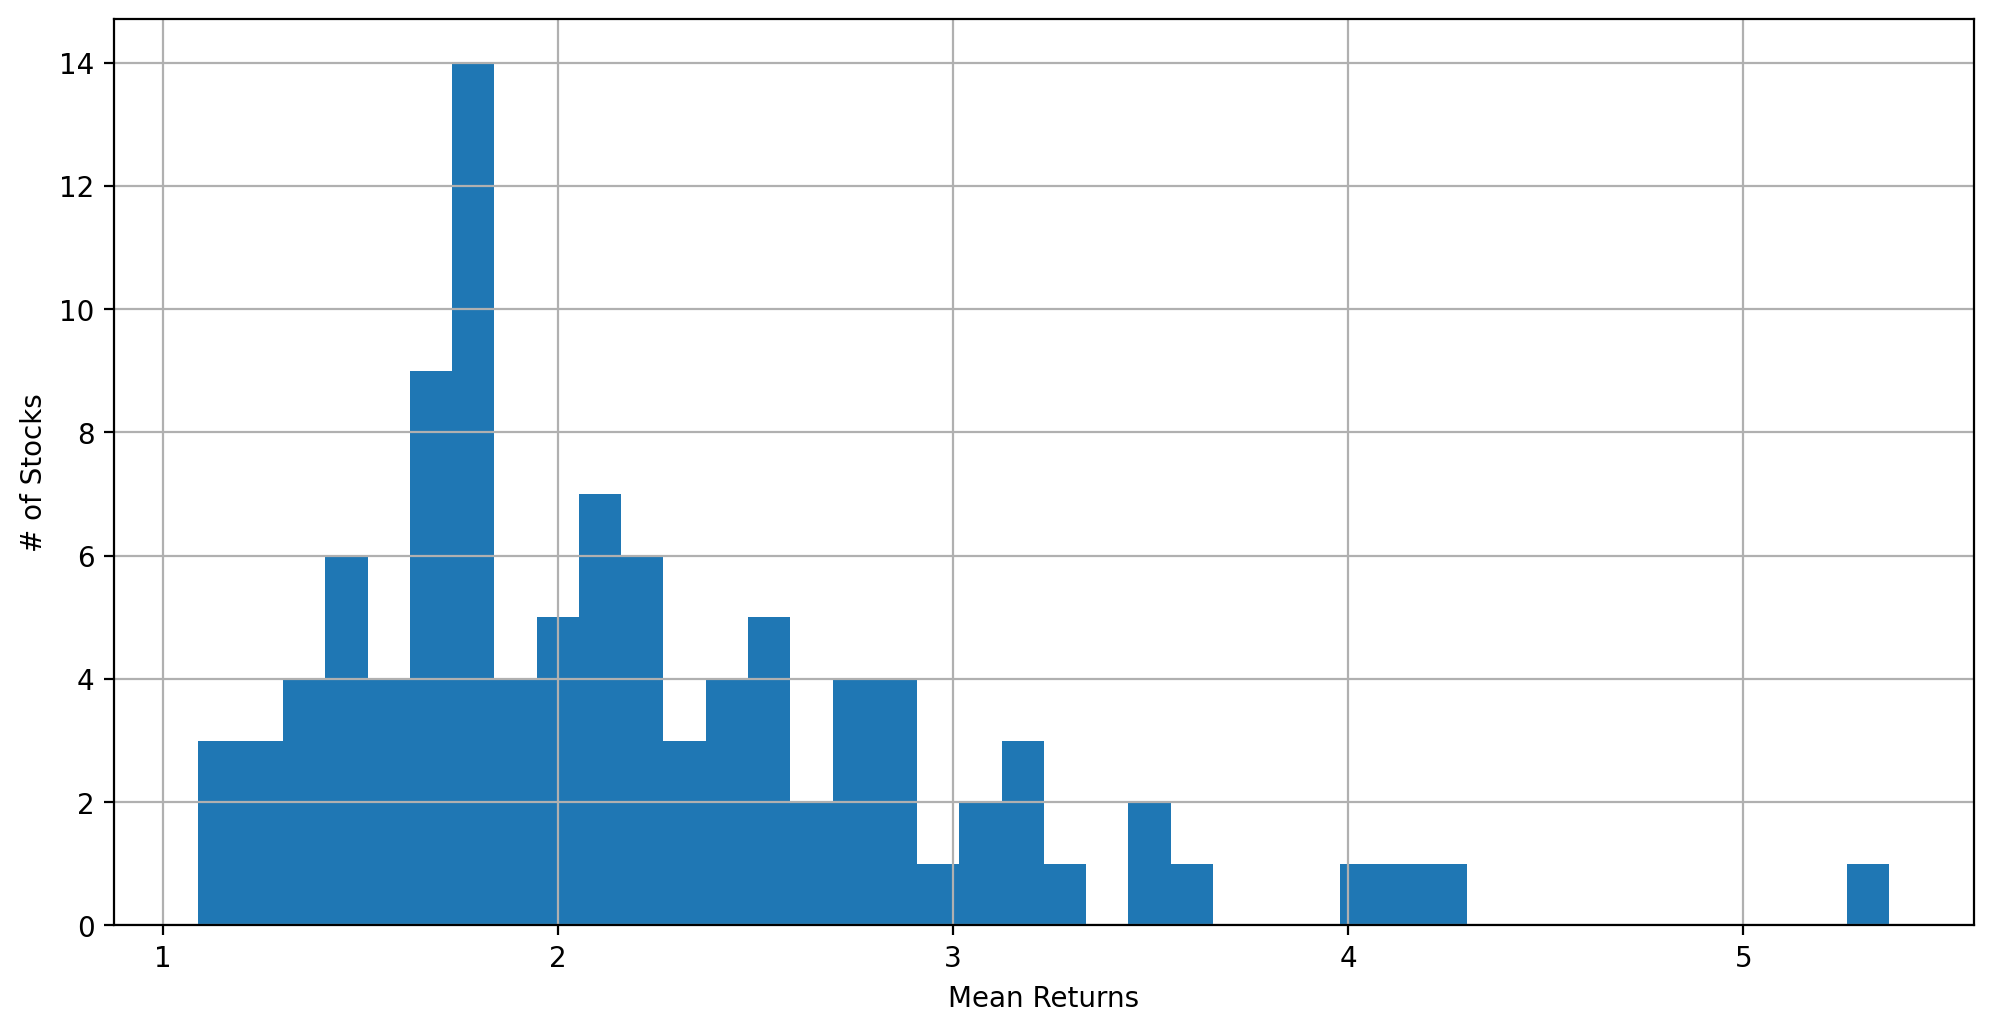

In [199]:

plt.figure(figsize=(12,6), dpi=200)
plt.hist(vals, bins=40);
plt.grid()
plt.xlabel('Mean Returns')
plt.ylabel('# of Stocks')